In [1]:
from squlearn.encoding_circuit import QiskitEncodingCircuit
from squlearn.observables import SummedPaulis
from squlearn.optimizers import Adam, SGLBO
from squlearn.qnn import QNNRegressor
from squlearn import Executor
from squlearn.qnn import SquaredLoss

import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

import matplotlib.pyplot as plt

## PQC

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


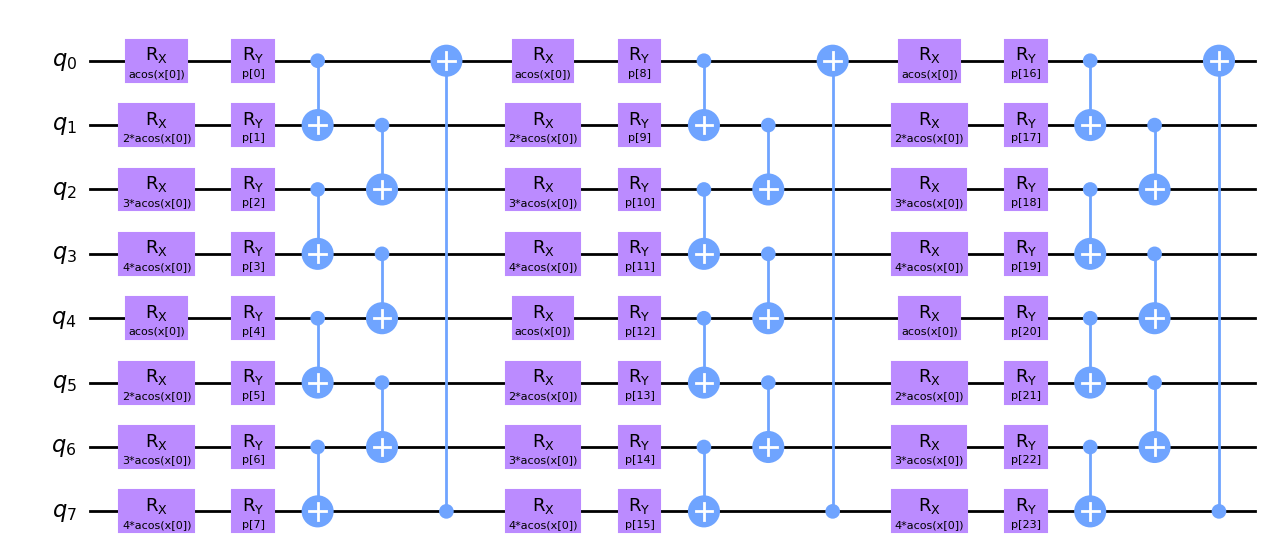

In [2]:
qc = QuantumCircuit(8)
p = ParameterVector('p', 24)
x = ParameterVector('x', 1)
num_parameters = 24

p2 = np.array([-0.13005136, -1.34331017, 2.44392299, 1.64405423, -0.36315523, 0.45344925,
                   0.18577077, -0.13904446])

qc.rx(1 * np.arccos(x[0]), 0)
qc.rx(2 * np.arccos(x[0]), 1)
qc.rx(3 * np.arccos(x[0]), 2)
qc.rx(4 * np.arccos(x[0]), 3)
qc.rx(1 * np.arccos(x[0]), 4)
qc.rx(2 * np.arccos(x[0]), 5)
qc.rx(3 * np.arccos(x[0]), 6)
qc.rx(4 * np.arccos(x[0]), 7)

qc.ry(p[0], 0)
qc.ry(p[1], 1)
qc.ry(p[2], 2)
qc.ry(p[3], 3)
qc.ry(p[4], 4)
qc.ry(p[5], 5)
qc.ry(p[6], 6)
qc.ry(p[7], 7)

qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(4, 5)
qc.cx(6, 7)
qc.cx(1, 2)
qc.cx(3, 4)
qc.cx(5, 6)
qc.cx(7, 0)

qc.rx(1 * np.arccos(x[0]), 0)
qc.rx(2 * np.arccos(x[0]), 1)
qc.rx(3 * np.arccos(x[0]), 2)
qc.rx(4 * np.arccos(x[0]), 3)
qc.rx(1 * np.arccos(x[0]), 4)
qc.rx(2 * np.arccos(x[0]), 5)
qc.rx(3 * np.arccos(x[0]), 6)
qc.rx(4 * np.arccos(x[0]), 7)

qc.ry(p[8], 0)
qc.ry(p[9], 1)
qc.ry(p[10], 2)
qc.ry(p[11], 3)
qc.ry(p[12], 4)
qc.ry(p[13], 5)
qc.ry(p[14], 6)
qc.ry(p[15], 7)


qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(4, 5)
qc.cx(6, 7)
qc.cx(1, 2)
qc.cx(3, 4)
qc.cx(5, 6)
qc.cx(7, 0)

qc.rx(1 * np.arccos(x[0]), 0)
qc.rx(2 * np.arccos(x[0]), 1)
qc.rx(3 * np.arccos(x[0]), 2)
qc.rx(4 * np.arccos(x[0]), 3)
qc.rx(1 * np.arccos(x[0]), 4)
qc.rx(2 * np.arccos(x[0]), 5)
qc.rx(3 * np.arccos(x[0]), 6)
qc.rx(4 * np.arccos(x[0]), 7)

qc.ry(p[16], 0)
qc.ry(p[17], 1)
qc.ry(p[18], 2)
qc.ry(p[19], 3)
qc.ry(p[20], 4)
qc.ry(p[21], 5)
qc.ry(p[22], 6)
qc.ry(p[23], 7)


qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(4, 5)
qc.cx(6, 7)
qc.cx(1, 2)
qc.cx(3, 4)
qc.cx(5, 6)
qc.cx(7, 0)

pqc = QiskitEncodingCircuit(qc)
pqc.draw("mpl")

In [3]:
## Observable

In [4]:
nqubits = 8
op = SummedPaulis(nqubits)

In [5]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.ones(op.num_parameters)

## Adam

In [6]:

qnn_simulator_adam = QNNRegressor(
        pqc,
        op,
        Executor("statevector_simulator"),
        SquaredLoss(),
        Adam({"lr": 0.005, "log_file": f"adam_{num_parameters}_params_new.log", "maxiter": 500}),
        param_ini,
        param_op_ini=param_op_ini,
        opt_param_op=True,  
        parameter_seed=124
    )

In [7]:
# Data that is inputted to the QNN
x_train = np.arange(-0.5, 0.6, 0.1)
# Data that is fitted by the QNN
y_train = np.sin(6.0 * x_train)

qnn_simulator_adam.fit(x_train, y_train)


fit: 100%|██████████| 500/500 [47:29<00:00,  5.47s/it]